<a href="https://colab.research.google.com/github/roshank1605A04/Insurance-Claim-Prediction/blob/master/InsuranceClaim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Installing the Libraries**

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

**Importing the Dataset**

In [0]:
data = pd.read_csv('drive/My Drive/Projects/insuarance claim/insurance.csv')

print(data.shape)

data.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [0]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [0]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [0]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [0]:
data['age'].value_counts()

18    69
19    68
51    29
45    29
46    29
47    29
48    29
50    29
52    29
20    29
26    28
54    28
53    28
25    28
24    28
49    28
23    28
22    28
21    28
27    28
28    28
31    27
29    27
30    27
41    27
43    27
44    27
40    27
42    27
57    26
34    26
33    26
32    26
56    26
55    26
59    25
58    25
39    25
38    25
35    25
36    25
37    25
63    23
60    23
61    23
62    23
64    22
Name: age, dtype: int64

In [0]:
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [0]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [0]:
data['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [0]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

**Data Analysis**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'Age vs Charges')

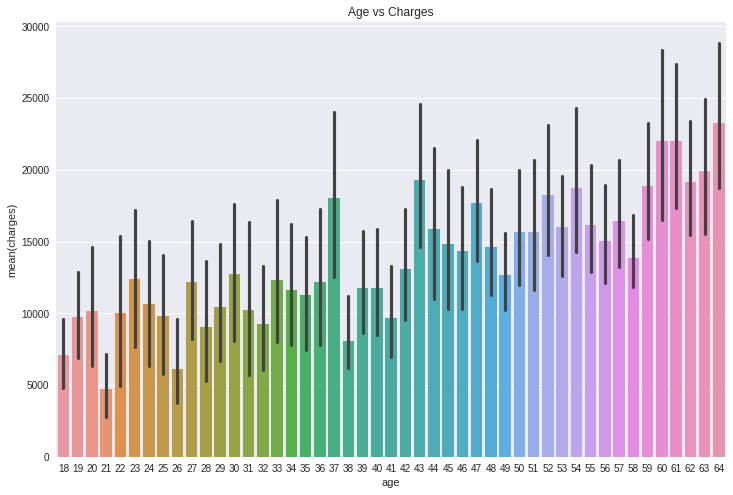

In [0]:
# Age vs Charges
# the more the age the more will be insurance charge (roughly estimated)

plt.figure(figsize = (12, 8))
sns.barplot(x = 'age', y = 'charges', data = data)

plt.title("Age vs Charges")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'sex vs charges')

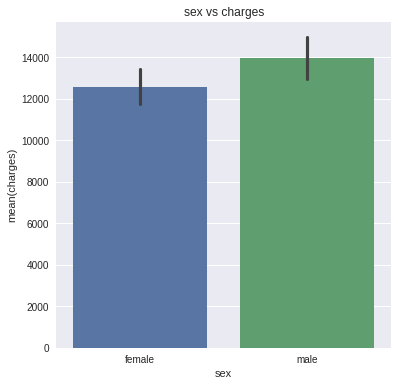

In [0]:
# sex vs charges
# males have slightly greater insurance charges than females in general

plt.figure(figsize = (6, 6))
sns.barplot(x = 'sex', y = 'charges', data = data)

plt.title('sex vs charges')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'children vs charges')

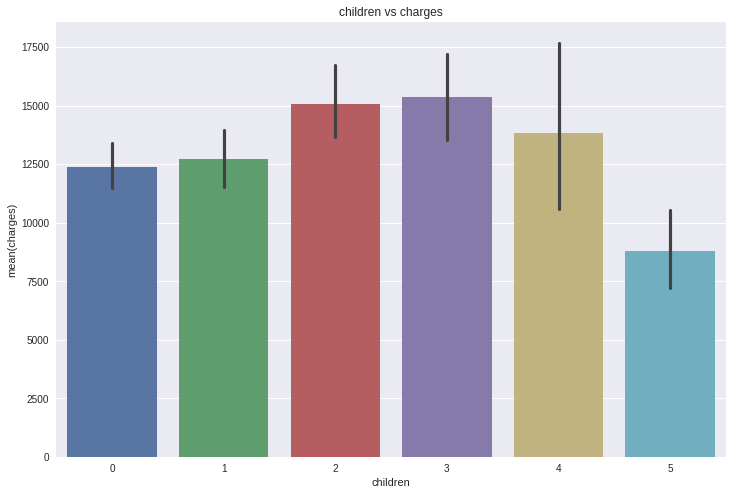

In [0]:
# children vs charges
# no. of childrens of a person has a very interesting dependency on insurance costs

plt.figure(figsize = (12, 8))
sns.barplot(x = 'children', y = 'charges', data = data)

plt.title('children vs charges')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'region vs charges')

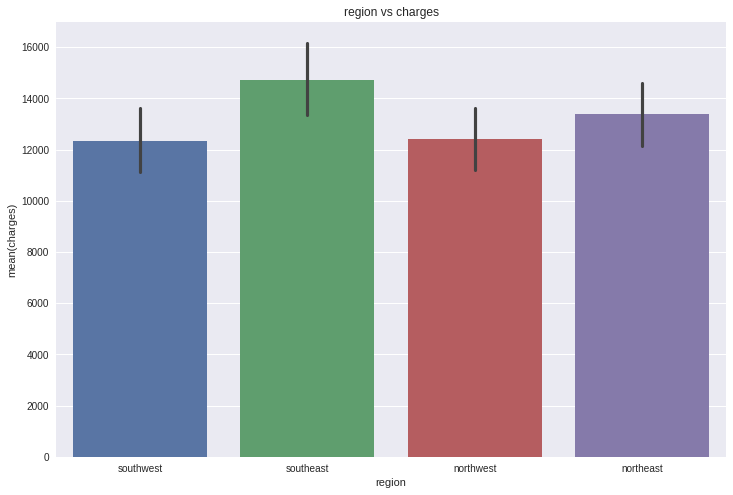

In [0]:
# region vs charges
# From the graph we can see that the region actually does not play any role in determining the insurance charges

plt.figure(figsize = (12, 8))
sns.barplot(x = 'region', y = 'charges', data = data)

plt.title('region vs charges')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'smoker vs charges')

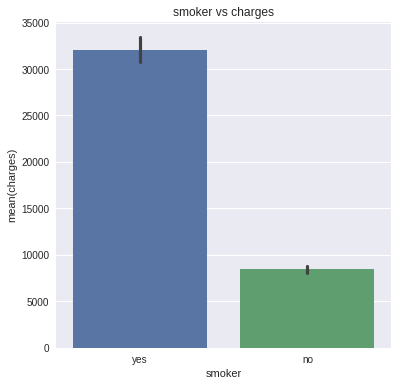

In [0]:
# smoker vs charges
# from the graph below, it is visible that smokers have more insurance charges than the non smokers

plt.figure(figsize = (6, 6))
sns.barplot(x = 'smoker', y = 'charges', data = data)

plt.title('smoker vs charges')

**Correlation Plot**

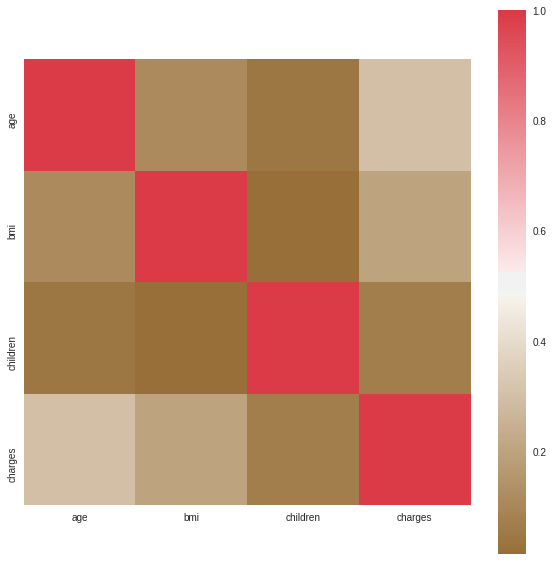

In [0]:
# plotting the correlation plot for the dataset

f, ax = plt.subplots(figsize = (10, 10))

corr = data.corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool), 
            cmap = sns.diverging_palette(50, 10, as_cmap = True), square = True, ax = ax)

**Data Pre-processing**

In [0]:
# removing unnecassary columns from the dataset

data = data.drop('region', axis = 1)

print(data.shape)

data.columns

(1338, 6)


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

In [0]:
# label encoding for sex and smoker

# importing label encoder
from sklearn.preprocessing import LabelEncoder

# creating a label encoder
le = LabelEncoder()


# label encoding for sex
# 0 for females and 1 for males
data['sex'] = le.fit_transform(data['sex'])

# label encoding for smoker
# 0 for smokers and 1 for non smokers
data['smoker'] = le.fit_transform(data['smoker'])

In [0]:
data['sex'].value_counts()

1    676
0    662
Name: sex, dtype: int64

In [0]:
data['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [0]:
# splitting the dependent and independent variable

x = data.iloc[:,:5]
y = data.iloc[:,5]

print(x.shape)
print(y.shape)

(1338, 5)
(1338,)


In [0]:
# splitting the dataset into training and testing sets

from sklearn.cross_validation import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 30)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 5)
(268, 5)
(1070,)
(268,)


In [0]:
# standard scaling

from sklearn.preprocessing import StandardScaler

# creating a standard scaler
sc = StandardScaler()

# feeding independents sets into the standard scaler
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)



**Modelling**

**Linear Regression**

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# creating the model
model = LinearRegression()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2, axis = None)
print("MSE :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# Calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2 score :", r2)



MSE : 37806750.25007656
RMSE : 6148.719399198223
r2 score : 0.75490433195409


In [0]:
y_test

338     41919.09700
620      3659.34600
965      4746.34400
128     32734.18630
329      9144.56500
440      4738.26820
1215    12890.05765
387     30284.64294
1037    39725.51805
1015    12124.99240
878      6282.23500
171      8116.68000
1090    41676.08110
544     10231.49990
648      1712.22700
664     27037.91410
313      8124.40840
1293     9301.89355
417     18608.26200
1280     8283.68070
349      1635.73365
93       5729.00530
400      9264.79700
805      7731.85785
52      23568.27200
94      47291.05500
1018    12495.29085
981      4500.33925
272      7265.70250
405     11396.90020
           ...     
1063     6548.19505
30      35585.57600
752     14210.53595
1084    15019.76005
1259    10197.77220
90       2026.97410
962     14474.67500
131     13616.35860
1163     2200.83085
12       1826.84300
671      3943.59540
1132    20709.02034
1245     5615.36900
424      8968.33000
718     10848.13430
244     29523.16560
238     17352.68030
984      4915.05985
1144     9630.39700


In [0]:
y_pred

array([34463.03582081,  5351.63285316,  5380.9763682 , 25960.03740848,
       12496.7519736 ,  6408.63819349,  4081.62037308,  9300.34454944,
       32957.30705757, 10937.63104598,  7519.13584334,  9726.30820152,
       34438.32925237, 11046.23596617,   819.90626006, 35368.51634447,
       11430.73775682,  8747.50405981, 28520.23066838, 10780.77269818,
         885.55261833,  8140.91449068,  7686.87521254, 10734.04414171,
       32605.85490348, 38733.33147903, 14385.6266007 ,  2947.77854767,
       10456.87417122, 14224.24201886,  1675.51537561, 30193.11285619,
         944.28091937, 14459.05536274, 12261.67368565,  8411.64973742,
        1863.86250159,  6487.85043844,   186.61387983,  8192.76868362,
        6366.87004436, 33513.53920691,  2007.49195393, 13551.24985198,
       10145.95016308, 29556.16908321,  4878.71697149,  2536.59789849,
        2321.4068302 ,  4974.23941116, 10987.31701618, 12416.97110239,
       11958.11247547,   878.6345611 , 10867.31696491,  7014.47673418,
      

**Support Vector Machine**

In [0]:
from sklearn.svm import SVR

# creating the model
model = SVR()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2, axis = None)
print("MSE :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# Calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2 score :", r2)


MSE : 174595630.81989565
RMSE : 13213.46399775228
r2 score : -0.13187810353027452


**Random Forest**

In [0]:
from sklearn.ensemble import RandomForestRegressor

# creating the model
model = RandomForestRegressor(n_estimators = 40, max_depth = 4, n_jobs = -1)

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2, axis = None)
print("MSE :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# Calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2 score :", r2)


MSE : 21717508.582995377
RMSE : 4660.204779083788
r2 score : 0.8592085477002548


In [0]:
print(y_pred)


[43997.07183262  5643.68376578  5921.56733358 17084.37945398
 10808.12037585  5643.68376578  2704.27338491 10453.50494815
 44890.79944659 13448.00014646  6815.58337828 10778.77800689
 44540.67607466 13700.60463004  2726.85425837 25210.10569283
 10743.4046451   8860.72300279 17822.03085522 10101.97821798
  2726.85425837  6403.92573644 10313.05051058  7819.12885586
 25397.64860244 45400.99154237 14119.98188175  5089.32237084
  7023.21485389 10764.2115562   5247.36684177 37646.47046568
  2786.5994889  10764.2115562  13503.57329705  6403.92573644
  2769.89366917  6815.58337828  2726.85425837  6339.45659245
  6599.75848925 23740.30558057  4364.2255701  13503.57329705
  6759.06397042 40179.06572487  6445.75323363  2704.27338491
  3575.13441081  6584.52071248  7199.93083636 10048.03850355
 13503.57329705  2726.85425837  7023.21485389  7724.14041532
 20752.59506545  4936.84883426 13503.57329705  6219.10750899
 13952.7734646   6480.59535745 10961.69660237  4942.19313587
  2726.85425837  5587.16

In [0]:
print(y_test)

338     41919.09700
620      3659.34600
965      4746.34400
128     32734.18630
329      9144.56500
440      4738.26820
1215    12890.05765
387     30284.64294
1037    39725.51805
1015    12124.99240
878      6282.23500
171      8116.68000
1090    41676.08110
544     10231.49990
648      1712.22700
664     27037.91410
313      8124.40840
1293     9301.89355
417     18608.26200
1280     8283.68070
349      1635.73365
93       5729.00530
400      9264.79700
805      7731.85785
52      23568.27200
94      47291.05500
1018    12495.29085
981      4500.33925
272      7265.70250
405     11396.90020
           ...     
1063     6548.19505
30      35585.57600
752     14210.53595
1084    15019.76005
1259    10197.77220
90       2026.97410
962     14474.67500
131     13616.35860
1163     2200.83085
12       1826.84300
671      3943.59540
1132    20709.02034
1245     5615.36900
424      8968.33000
718     10848.13430
244     29523.16560
238     17352.68030
984      4915.05985
1144     9630.39700


**Decision Forest**

In [0]:
from sklearn.tree import DecisionTreeRegressor

# creating the model
model = DecisionTreeRegressor()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2, axis = None)
print("MSE :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# Calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2 score :", r2)


MSE : 40187138.67582586
RMSE : 6339.3326680200225
r2 score : 0.7394726196921615
